In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
import keras.optimizers 
import keras.losses
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten, Dropout
%matplotlib inline

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


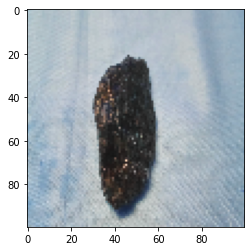

In [9]:
datadir = '/content/drive/My Drive/RP'

categories = ['rock', 'paper']
for i in categories:
    path = os.path.join(datadir, i)    
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (100, 100))
        plt.imshow(new_array)
        plt.show()
        break
    break

In [10]:
training_data = []
def create_training_data():
    for i in categories:
        path = os.path.join(datadir, i)
        class_num = categories.index(i)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (100, 100))
            training_data.append([new_array, class_num])
create_training_data()

In [11]:
len(training_data)

400

In [12]:
import random
random.shuffle(training_data)

In [13]:
X = []
Y = []
for features, label in training_data:
    X.append(features)
    Y.append(label)
   
X = np.array(X).reshape(-1, 100, 100,1)
Y = np.array(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.05) 

In [14]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(380, 100, 100, 1) (20, 100, 100, 1) (380,) (20,)


In [15]:
X_train = X_train/255.0
X_test = X_test/255.0

In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3),padding="valid", input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2), (2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding="valid"))
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))
model.summary()
opt = keras.optimizers.Adagrad(learning_rate=0.01, decay = 1e-5)
losses = keras.losses.binary_crossentropy
model.compile(optimizer = opt,
              loss=losses, metrics = ['accuracy'])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
activation_3 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
activation_4 (Activation)    (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)       

In [20]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test, Y_test))
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Test Loss: {0} - Test Acc: {1}".format(test_loss, test_acc))

Train on 380 samples, validate on 20 samples
Epoch 1/5
380/380 [==============================] - 0s 867us/step - loss: 1.3116 - accuracy: 0.6079 - val_loss: 0.6074 - val_accuracy: 0.9500
Epoch 2/5
380/380 [==============================] - 0s 421us/step - loss: 0.4345 - accuracy: 0.8658 - val_loss: 0.3099 - val_accuracy: 0.9500
Epoch 3/5
380/380 [==============================] - 0s 418us/step - loss: 0.1705 - accuracy: 0.9684 - val_loss: 0.1291 - val_accuracy: 0.9500
Epoch 4/5
380/380 [==============================] - 0s 389us/step - loss: 0.0834 - accuracy: 0.9868 - val_loss: 0.0631 - val_accuracy: 1.0000
Epoch 5/5
20/20 [==============================] - 0s 251us/step
Test Loss: 0.06641505658626556 - Test Acc: 0.949999988079071
